# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

7. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [ ]:
# LAB COSTUMER ANALYSIS ROUND 3 BELOW

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [41]:
#1. I suppose '0 rows' is not normal but I don't know what to change !

df[(df['Total Claim Amount']== 'Total Claim Amount >1000') & (df['Response'] == 'Yes')]


,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type


In [42]:
#2. First of all, I have to say that I don't completely understand the question !
df['Policy Type'].value_counts()

Personal Auto     8128
Corporate Auto    2341
Special Auto       441
Name: Policy Type, dtype: int64

In [43]:
df['Gender'].value_counts()

F    5573
M    5337
Name: Gender, dtype: int64

In [11]:
# First I make a copy 
df.copy()[df['Response']== 'Yes']

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10872,10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10887,10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,...,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A


In [8]:
# Then, Filtering data to get only the "Yes" response
yes_resp = df[df['Response'] == 'Yes']
yes_resp

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10872,10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10887,10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,...,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A


In [10]:
#the average total_claim_amount by each policy type and gender for customers who have responded "Yes"
# Trying these two lines without success :

#yes_resp=df[ df["Response"] == "Yes"].groupby("Gender","Policy Type")[["Total Claim Amount"]].mean()
yes_resp=df[df["Response"] == "Yes"].groupby(["Gender","Policy Type"]).agg({"Total Claim Amount":mean})

NameError: name 'mean' is not defined

In [57]:
#Here is the point where I don't know what I am doing ! I just know that a dataframe with 6 rows is impossible !

result = yes_resp.groupby(['Policy Type', 'Gender'])['Total Claim Amount'].mean()
result

Policy Type     Gender
Corporate Auto  F         433.738499
                M         408.582459
Personal Auto   F         452.965929
                M         457.010178
Special Auto    F         453.280164
                M         429.527942
Name: Total Claim Amount, dtype: float64

In [26]:
result.info

<bound method DataFrame.info of       Policy Type Gender  Total Claim Amount
0  Corporate Auto      F          433.738499
1  Corporate Auto      M          408.582459
2   Personal Auto      F          452.965929
3   Personal Auto      M          457.010178
4    Special Auto      F          453.280164
5    Special Auto      M          429.527942>

In [32]:
result.types

AttributeError: 'DataFrame' object has no attribute 'types'

In [34]:
result["Total Claim Amount"].value_counts()

433.738499    1
408.582459    1
452.965929    1
457.010178    1
453.280164    1
429.527942    1
Name: Total Claim Amount, dtype: int64

In [ ]:
# Analysing :
# IF any of these results is correct:
# I don't see what to analyse (which is a problem for a futur analyst) !!!
# What I see, is that the total claim amount of all these people is very close, similar. 
# But I don't know what is the point between 1.the car type+the gender of the person+the fact that he/she responded "yes" and 2.the total claim amount.
# I don't see no sense. Therefor, I suppose my results are not correct :(!

In [ ]:
# 3.Analyze the total number of customers who have policies in each state:

In [55]:
each_state_cust = df['State'].value_counts()
each_state_cust

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: State, dtype: int64

In [ ]:
# California and Oregon are in head with the largest amount of customers

In [56]:
# filter the results to only include states where there are more than 500 customers:
each_state_cust[each_state_cust > 500]

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: State, dtype: int64

In [59]:
#Find the maximum, minimum, and median customer lifetime value by education level and gender :

df.groupby(['Education', 'Gender'])['Customer Lifetime Value'].agg(['max', 'min', 'median'])

max          min       median
Education            Gender                                       
Bachelor             F       73225.95652  1904.000852  5640.505303
                     M       67907.27050  1898.007675  5548.031892
College              F       61850.18803  1898.683686  5623.611187
                     M       61134.68307  1918.119700  6005.847375
Doctor               F       44856.11397  2395.570000  5332.462694
                     M       32677.34284  2267.604038  5577.669457
High School or Below F       55277.44589  2144.921535  6039.553187
                     M       83325.38119  1940.981221  6286.731006
Master               F       51016.06704  2417.777032  5729.855012
                     M       50568.25912  2272.307310  5579.099207

In [ ]:
#Write your conclusions:
# IF this table is correct, and IF this is the result I was looking for:
# > These huge numbers show that
#   - we can make no conclusion with genders, because no pattern stands out
#   - we can make conclusion with the median Customer Lifetime Value by Education level, because we can see that when people are getting high with their studies, number are decreasing.
#     Numbers are decreasing, so we can say that the more people are getting high in their studies, the less is their customer lifetime value.
#   - CLV decrease when people have high education because...they are better drivers ? They have good quality cars ?
#   - I can't make conclusion about the min and the max CLV by Eduction level, because nothing is obvious.

In [ ]:
# LAB COSTUMER ANALYSIS ROUND 3

In [ ]:
#- Show DataFrame info.
#- Describe DataFrame.
#- Show a plot of the total number of responses.
#- Show a plot of the response rate by the sales channel.
#- Show a plot of the response rate by incom

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib inline

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv')
df.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [8]:
#Show DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [9]:
#Describe DataFrame
df.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
df['Response'].value_counts()

No     8813
Yes    1466
Name: Response, dtype: int64

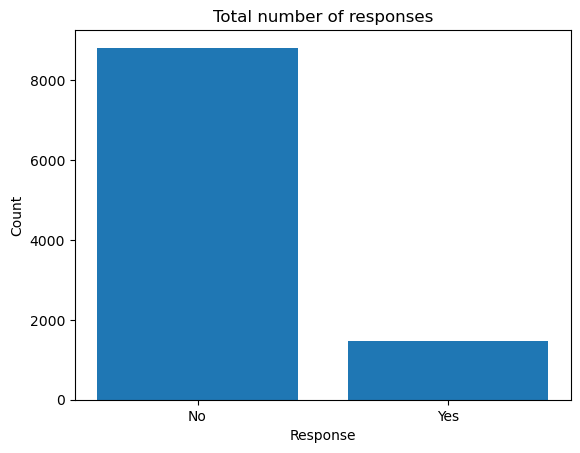

In [42]:
#Show a plot of the total number of responses
fig, ax = plt.subplots()
ax.bar(x = df['Response'].value_counts().index, height = df['Response'].value_counts().values)
ax.set_title("Total number of responses")
ax.set_xlabel("Response")
ax.set_ylabel("Count")
plt.show()

In [13]:
#Show a plot of the response rate by the sales channel
df['Sales Channel'].value_counts()

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: Sales Channel, dtype: int64

In [14]:
df[df['Response'] == 'Yes']

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
8,8,FM55990,California,5989.773931,Yes,Premium,College,1/19/11,Employed,M,...,0.0,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN
15,15,CW49887,California,4626.801093,Yes,Basic,Master,1/16/11,Employed,F,...,0.0,1,Special Auto,Special L1,Offer2,Branch,547.200000,SUV,Medsize,NaN
19,19,NJ54277,California,3746.751625,Yes,Extended,College,2/26/11,Employed,F,...,1.0,1,Personal Auto,Personal L2,Offer2,Call Center,19.575683,Two-Door Car,Large,A
27,27,MQ68407,Oregon,4376.363592,Yes,Premium,Bachelor,2/28/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Agent,60.036683,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10844,10844,FM31768,Arizona,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L1,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10872,10872,XT67997,California,5979.724161,Yes,Extended,High School or Below,2/7/11,Employed,F,...,0.0,3,Personal Auto,Personal L3,Offer2,Agent,547.200000,Four-Door Car,Medsize,NaN
10887,10887,BY78730,Oregon,8879.790017,Yes,Basic,High School or Below,2/3/11,Employed,F,...,0.0,7,Special Auto,Special L2,Offer1,Agent,528.200860,SUV,Small,A


In [20]:
df['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

In [26]:
df.groupby('Sales Channel') ['Response'].value_counts(normalize=True).unstack()

Response,No,Yes
Sales Channel,,
Agent,0.809254,0.190746
Branch,0.886213,0.113787
Call Center,0.890214,0.109786
Web,0.882859,0.117141


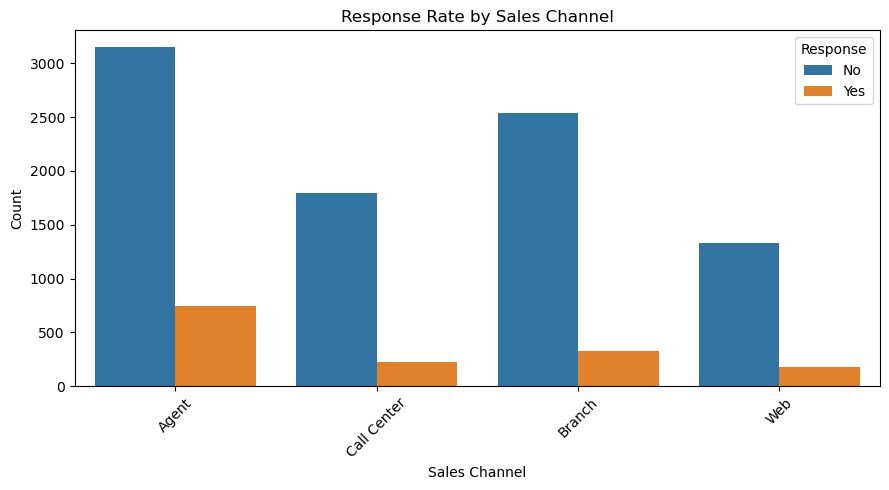

In [33]:
plt.figure(figsize=(9, 5))
sns.countplot(data=df, x='Sales Channel', hue='Response')
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [34]:
#- Show a plot of the response rate by incom
df['Income'].value_counts()

0        2787
95697      15
60920      11
68931      10
11432      10
         ... 
45310       1
88055       1
74606       1
88043       1
64195       1
Name: Income, Length: 5694, dtype: int64

In [44]:
df.groupby('Income') ['Response'].value_counts(normalize=True).unstack()

Response,No,Yes
Income,,
0,0.913675,0.086325
10037,1.000000,NaN
10074,1.000000,NaN
10097,1.000000,NaN
10105,1.000000,NaN
...,...,...
99875,1.000000,NaN
99934,1.000000,NaN
99960,1.000000,NaN


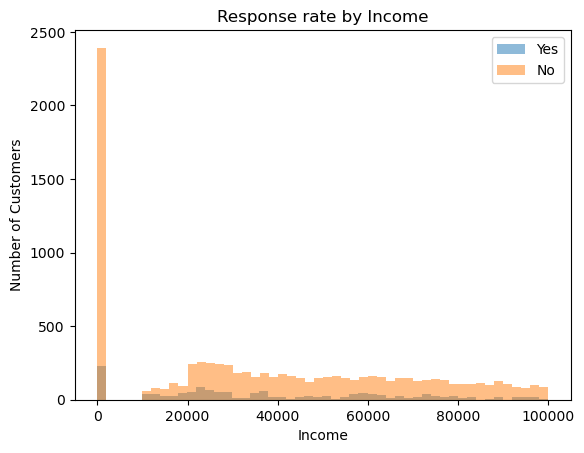

In [54]:
plt.hist(df[df['Response'] == 'Yes']['Income'], bins=50, alpha=0.5, label='Yes')
plt.hist(df[df['Response'] == 'No']['Income'], bins=50, alpha=0.5, label='No')
plt.title('Response rate by Income')
plt.ylabel('Number of Customers')
plt.xlabel('Income')
plt.legend(loc='upper right')
plt.show()

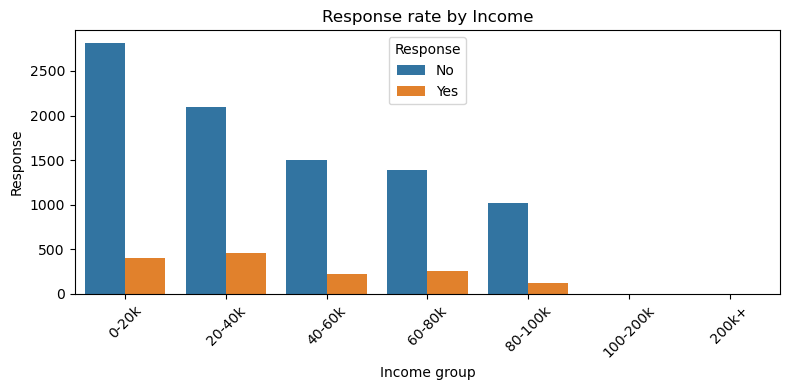

In [58]:
#Categories income into groups :
bins = [0, 20000, 40000, 60000, 80000, 100000, 200000, float('inf')]
labels = ['0-20k', '20-40k', '40-60k', '60-80k', '80-100k', '100-200k', '200k+']
df['Income group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Income group', hue='Response')
plt.title('Response rate by Income')
plt.xlabel('Income group')
plt.ylabel('Response')
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()